In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# importing datest from tensorflow lib
mnis=tf.keras.datasets.mnist

In [4]:
# splitting dataset
(x_train,y_train),(x_test,y_test)=mnis.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step


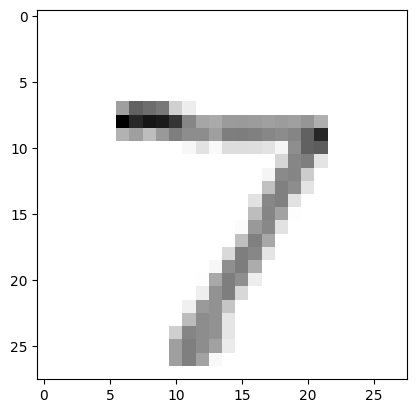

In [10]:
# showing data 
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [9]:
# normalizing data or we can say scaling the data 
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)

In [12]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [15]:
# loading the model
model=tf.keras.models.Sequential()
# flattening the data or converting image to from 2d image to 1d image
model.add(tf.keras.layers.Flatten())

# dense layer is a fully connected layer where each neuron is connected to every neuron in the previous layer
# 128 means it has 128 neurons which means it has 128 weights for each input features
# activation function which is used is relu 
#  f(x)=max(0,x)
# basically the layer learns 128 features from the data by combining the inputs and applying relu 
# this part is hidden layer 
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
# this layer process the features learned by previous layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))

# softmax is applied to the output layers 
# it converts output to probab of 10(cos dataset contains of only 10 classes i.e: 0-9)classes.
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

# loss function calculate how the model is performing 
# or 
# we can say how much prediction is correct in comparison to labels
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [22]:
# training the model
history=model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9837 - loss: 0.0530
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9878 - loss: 0.0378
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9914 - loss: 0.0268


In [23]:
# evaluating the model or calculating the accuracy or loss
val_loss,val_acc=model.evaluate(x_test,y_test)
print("acc",val_acc)
print("val loss",val_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.9711 - loss: 0.1034
acc 0.9746999740600586
val loss 0.09119431674480438


In [27]:
# saving the model
model.save("Digit_Reco.h5")
